# Temporal and spatial data mining

## Time Series [Clustering](https://scikit-learn.org/stable/modules/clustering.html#)

### Task 1

**a)** What is "clustering" and why it is an unsupervised learning process? 

**b)** Which aspects can influence the outcome of the clusters at the pre-processing stage?

**c)** In which application areas could be necessary to cluster time series data? Think about an use-case.

**d)** why is a hiererchical clustering considered advantageous or disadvantageous?

**e)** What is a dendrogram?

**f)** What are the differences between the "linkage" concepts and what are they used for?

**g)** can the three "linkage" concepts lead to different results? why?



**h)** What is $k$-means or $c$-means clustering? How does it work? What do $k$-means and *Expectation Maximization* have to do with each other?


 **---  Your Text Here ----** 


In [26]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Task 2: $k$-Means (Bonus)

**a)** Read the following data set `'./data/chart_data.h5'`

>Plot the data considering the index `TSID` and save the labels for each Time Series Sequence in a single array

In [27]:
data = pd.read_hdf("./data/chart_data.h5")
indicies = np.unique(data.index.values)
x = np.array([data[data.index == i]["chart_values"] for i in indicies])
print(x.shape)
y = np.array([i for i in indicies])

(823, 332)


**b)** Is there some preprocessing required? Explain/comment shortly the Pre-Processing techniques applied in python if necessary.

False


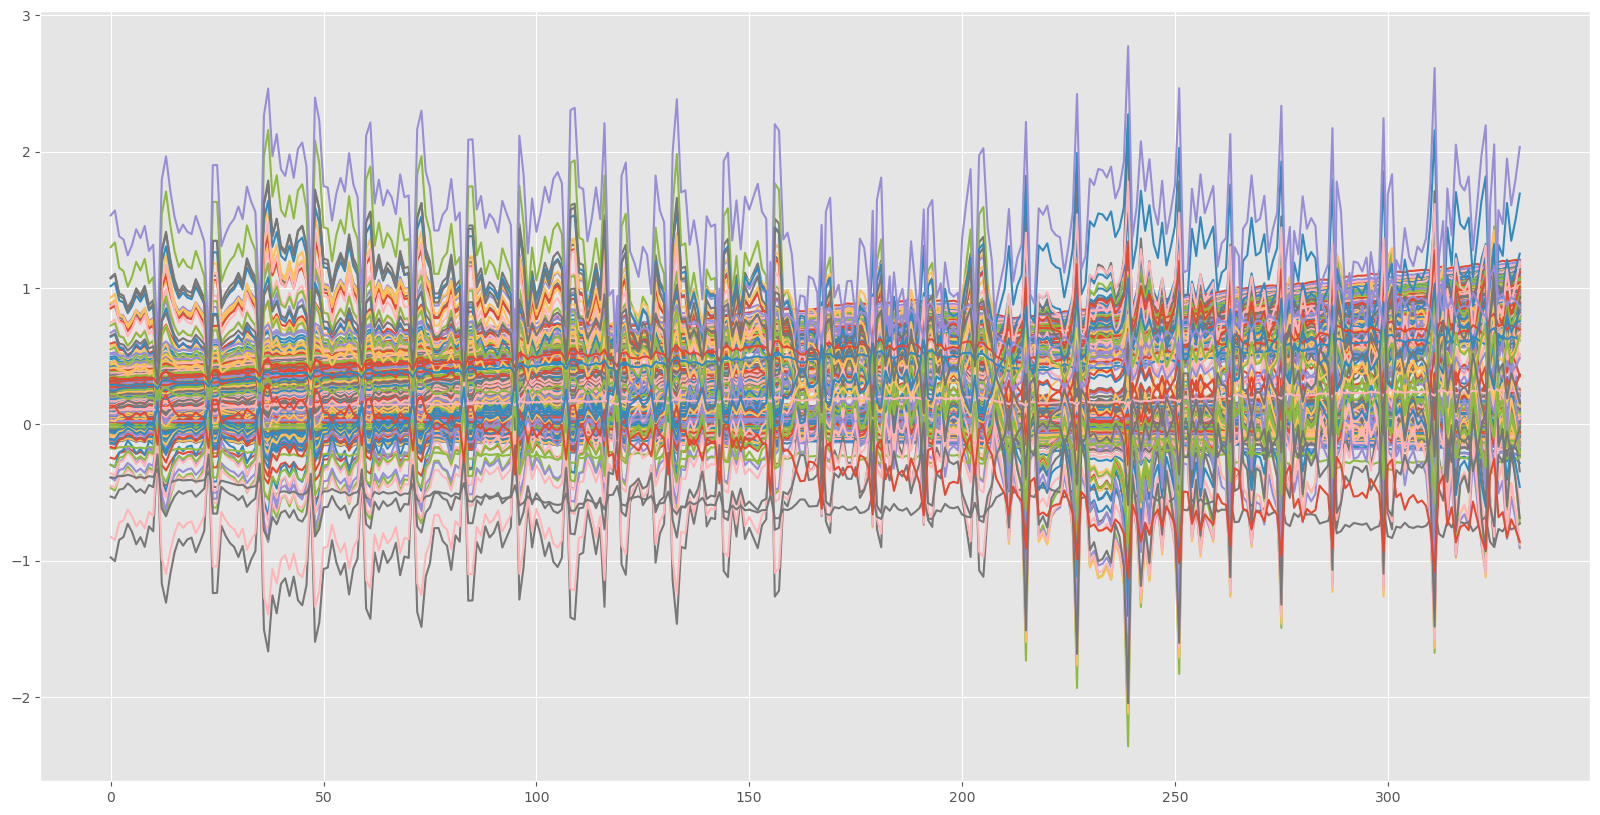

In [28]:
plt.figure(figsize=(20,10))
plt.plot(x.T)  
print(np.isnan(x).any())
plt.show()

In [29]:
# preprocess: standarisieren
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_scaled = standard_scaler.fit_transform(X=x)

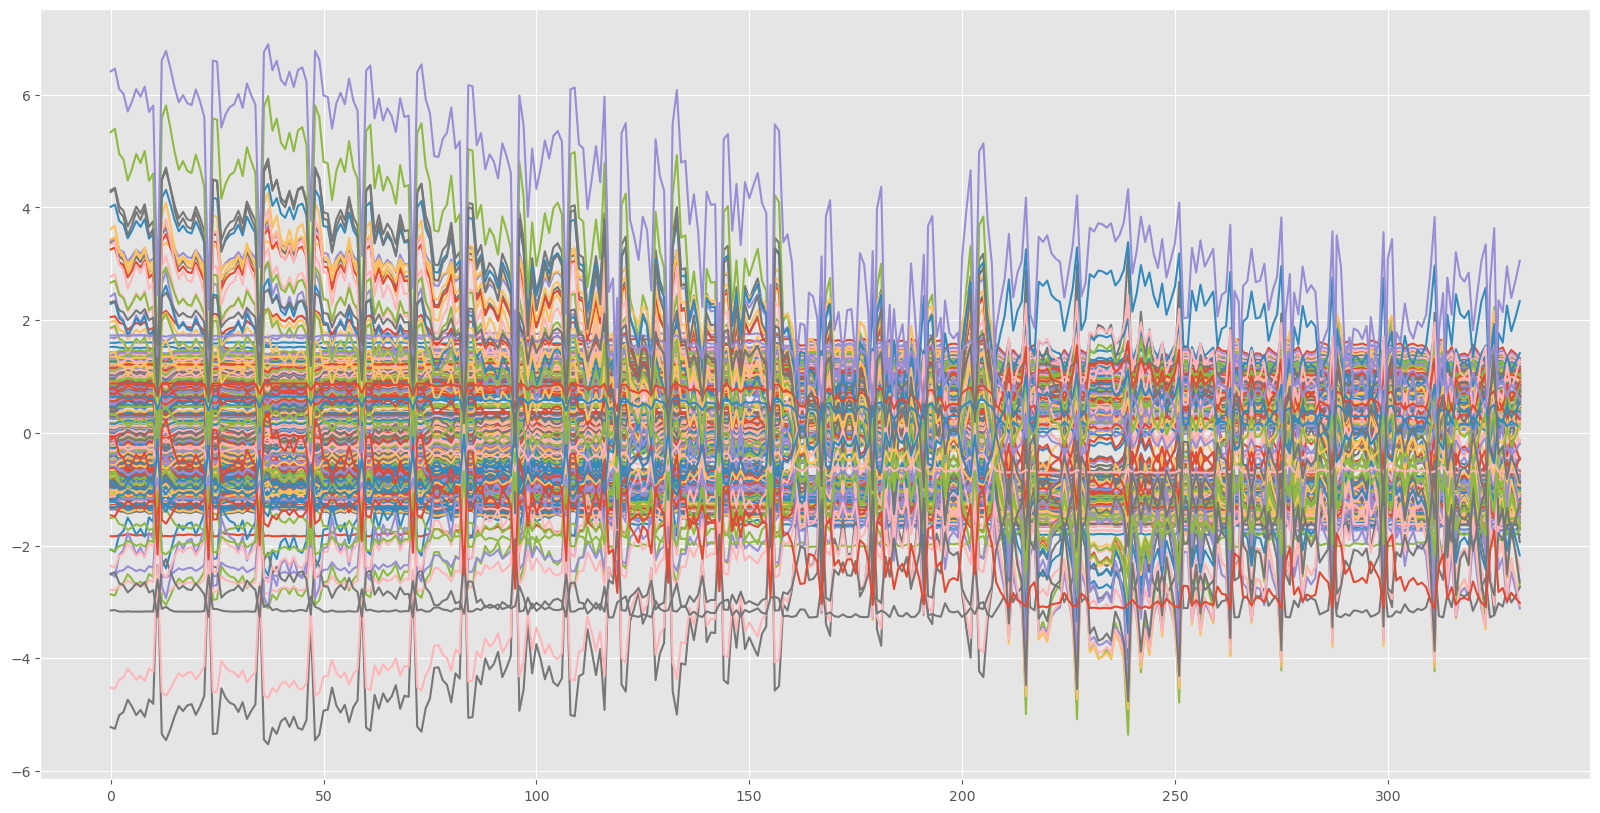

In [30]:
plt.figure(figsize=(20,10))
plt.plot(x_scaled.T)  
#for i in x: äquivalent
#    plt.plot(i)
plt.show()

**c)** Does it make sense to reduce the dimensionality of the data? Implement a suitable technique on python if required

>Find a two dimensional representation of each time series e.g. mapping the complete sequence into a two dimensional space.

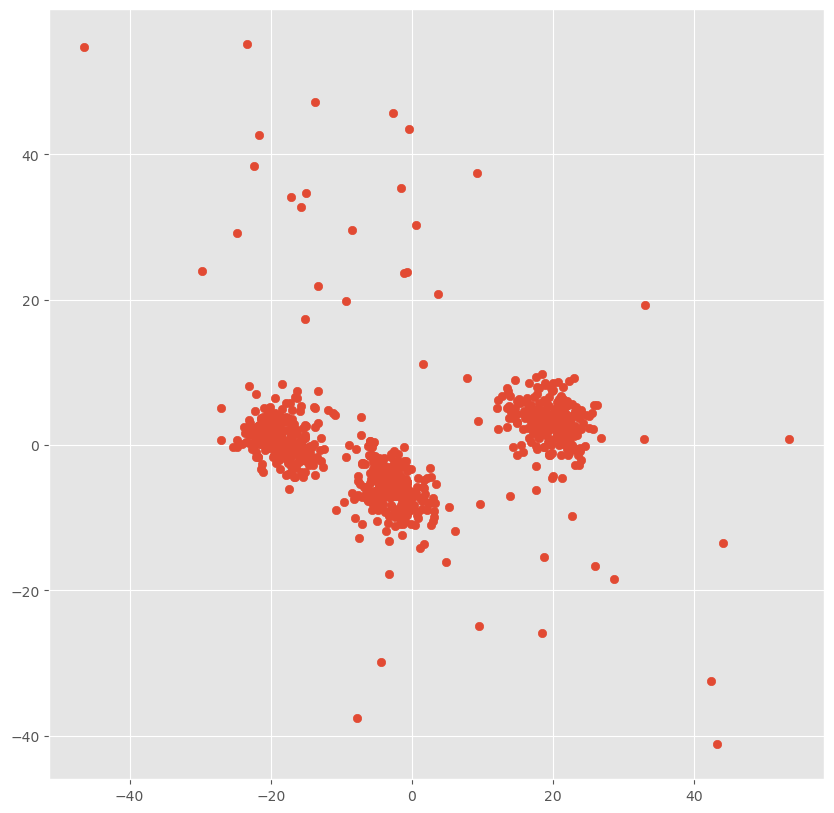

In [31]:
from sklearn.decomposition import PCA

pca = PCA(2)
x_scaled_small = pca.fit_transform(x_scaled)
plt.figure(figsize=(10,10))
plt.scatter(x_scaled_small[:,0], x_scaled_small[:,1])
plt.show()


**d)** Apply $k$-means for clustering the time series data. How many Clusters do you consider to use? 

>For the estimation of the quality of a clustering there are many different evaluation measures. One of the most common is the [Davies Bouldin Index](https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index) ([wiki](https://en.wikipedia.org/wiki/Davies%E2%80%93Bouldin_index)) or the averaged [Intra-Cluster-Distance](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)     ([geeksforgeeks](https://www.geeksforgeeks.org/ml-intercluster-and-intracluster-distance/)). Familiarize yourself with the two measures.

>**Davies-Bouldin-Index**

>\begin{align}
    \mu_i = & \frac{1}{|C_i|} \sum_{y \in C_i}{y} \text{ (Clusters centers)} \\
    d_i = & \frac{1}{|C_i|}\sum_{y \in C_i} d(y,\mu_i) \text{ (by distance to the cluster center)}\\
    R_{ij} = & \frac{d_i + d_j}{d (\mu_i, \mu_j)}\\
    R_i = & \max{R_{ij} | 1 \leq J \leq K , i \neq j}\\
    DB = &\frac{1}{K}\sum_{i=1}^{K}R_i
\end{align}

>$R_{ij}$ : Compactness of two clusters in relation to their distance from each other (the smaller $R_{ij}$ the better $C_i$ and $C_j$ are separated from each other)

>$R_i$: how well is $C_i$ separated from other clusters in the worst case?

>$DB$: Average of all $R_i$ (the smaller the better)

>**Average intra-cluster distance (ICD):**

>The average intra-cluster distance corresponds to the average distance between the points in a cluster multiplied by the number of points minus 1. Becomes smaller as the number of clusters increases.

**Hint: Plot the DB Score/ICD for multiple number of clusters and find the optimal value**

In [42]:
from sklearn.cluster import KMeans
num_classes = 2
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(x_scaled_small)
print(kmeans.cluster_centers_)
#print(cluster)

[[ 19.71550139   2.75385829]
 [-10.66999982  -1.49038398]]


/opt/homebrew/anaconda3/envs/TSDM-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [68]:
def bd(data, num_classes):
    kmeans = KMeans(num_classes)
    kmeans.fit(data)
    labels = kmeans.labels_
    d = np.array([np.mean([np.abs(np.dot(y, center)) for y in data[labels == cluster_num]]) for cluster_num, center in enumerate(kmeans.cluster_centers_)])
    r = np.array([[(d[i] + d[j]) / np.abs(np.dot(kmeans.cluster_centers_[i], kmeans.cluster_centers_[j])) if i != j else 0 for i in range(num_classes)] for j in range(num_classes)]) 
    r = np.max(r, axis=0)
    return np.mean(r)

from sklearn.metrics import davies_bouldin_score, silhouette_score

kmeans = KMeans(2)
kmeans.fit(x_scaled_small)
labels = kmeans.labels_
#print(labels)

print(davies_bouldin_score(x_scaled_small, labels)) #true
print(bd(x_scaled_small, 2)) # false
    

0.49038721237944055
2.398902322669005


/opt/homebrew/anaconda3/envs/TSDM-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/envs/TSDM-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
def avg_center_dist(kmeans: KMeans, data, clusters):
    return [np.mean([np.abs(np.dot(y, center)) for y in data[clusters == cluster_num]]) for cluster_num, center in enumerate(kmeans.cluster_centers_)]

def r_i_j(kmeans:KMeans, i, j, dist_i, dist_j):
    print(i, j, dist_i, dist_j)
    mu_i = kmeans.cluster_centers_[i]
    mu_j = kmeans.cluster_centers_[j]
    print((dist_i + dist_j) / np.abs(np.dot(mu_i, mu_j)))
    return (dist_i + dist_j) / np.abs(np.dot(mu_i, mu_j))

def DB(num_classes:int, kmeans:KMeans, x_scaled_small, clusters):
    avg_dist = avg_center_dist(kmeans=kmeans, data=x_scaled_small, clusters=clusters)
    return np.mean([max([r_i_j(kmeans=kmeans, i=k, j=j, dist_i=avg_dist[k], dist_j=avg_dist[j]) for j in range(0, k)]) for k in range(num_classes)])

avg_dist = avg_center_dist(kmeans=kmeans, data=x_scaled_small, clusters=clusters)
r_i_j(kmeans=kmeans, i=0, j=1, dist_i=avg_dist[0], dist_j=avg_dist[1])
#print(DB(num_classes=num_classes, kmeans=kmeans, x_scaled_small=x_scaled_small, clusters=clusters))

0 1 396.2847305199266 118.204737980909
2.3989023226690054


ValueError: max() arg is an empty sequence

/opt/homebrew/anaconda3/envs/TSDM-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/envs/TSDM-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/envs/TSDM-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/envs/TSDM-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureW

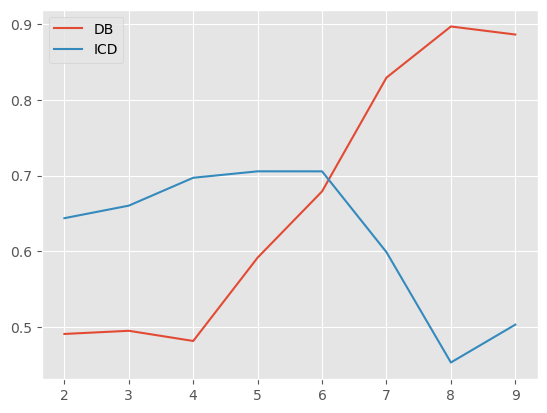

In [69]:
DB_scores = []
ICD_scores = []
class_numbers = list(range(2, 10))
for i in class_numbers:
    kmeans = KMeans(i)
    kmeans.fit(x_scaled_small)
    labels = kmeans.labels_
    DB_scores.append(davies_bouldin_score(x_scaled_small, labels))
    ICD_scores.append(silhouette_score(x_scaled_small, labels))

plt.plot(class_numbers, DB_scores, label='DB')
plt.plot(class_numbers, ICD_scores, label='ICD')
plt.legend()
plt.show()

**f)** Do a scaling procedure at the Pre-Processing stage influence the results? Discuss

### Task 3: DBSCAN (Bonus)

**a)** Apply now DBSCAN for clustering the time series data given in **Task 2**

>Repeat all the steps above and find the best parameters for DBSCAN. How many clusters do you recognize? What is the difference?

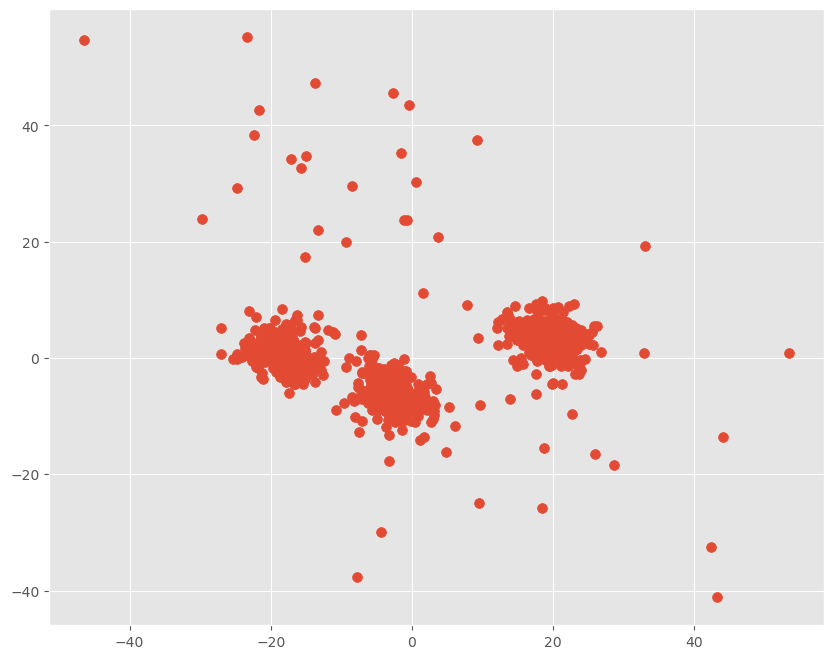

In [70]:
plt.figure(figsize=(10,8))
plt.scatter(x_scaled_small[:,0],x_scaled_small[:,1], s=50)
plt.show()

In [101]:
from sklearn.cluster import DBSCAN


eps_range = np.linspace(0.6, 2, 10)
min_samples_range = np.arange(6, 25) 
hyperparameters = np.array(np.meshgrid(eps_range, min_samples_range)).T.reshape(-1,2)
DBI_row_list = []
for hyperparameter in hyperparameters:
    dbscan = DBSCAN(eps=hyperparameter[0], min_samples=int(hyperparameter[1]))
    dbscan.fit(x_scaled_small)
    labels = dbscan.labels_
    DBI_row_list.append(silhouette_score(x_scaled_small, labels))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

NameError: name 'DBI_row_list' is not defined

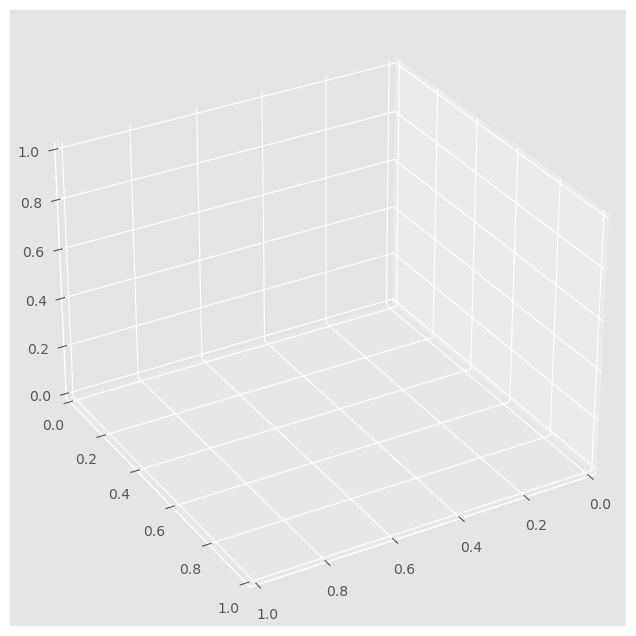

In [72]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
X, Y = np.meshgrid(eps_range,min_samples_range)
ax.plot_surface(X, Y, np.vstack(DBI_row_list).transpose(), cmap="plasma")

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 225)
X, Y = np.meshgrid(eps_range,min_samples_range)
ax.plot_surface(X, Y, np.vstack(ICD_row_list).transpose(), cmap="plasma")

In [ ]:
### SOLUTION ###

db = DBSCAN(eps=0.2, min_samples=10).fit(mySeries_transformed)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

**d)** Plot the Data with a scatter Plot and color labels

In [ ]:
####################
# Your Code Here   #
####################